# Sales Analysis - Electronic store
---
Analyze and answer business questions about 12 months worth of sales data. The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost, purchase address, etc.

We start by cleaning our data. Tasks during this section include:

- Drop NaN values from DataFrame

- Removing rows based on a condition

- Change the type of columns (to_numeric, to_datetime, astype)

Once we have cleaned up our data a bit, we move the data exploration section. In this section we explore 5 high level business questions related to our data:

- What was the best month for sales? How much was earned that month?

- What city sold the most product?

- What time should we display advertisemens to maximize the likelihood of customer’s buying product?

- What products are most often sold together?

- What product sold the most? Why do you think it sold the most?

To answer these questions we walk through many different pandas & matplotlib methods. They include:

- Concatenating multiple csvs together to create a new DataFrame (pd.concat)

- Adding columns

- Parsing cells as strings to make new columns (.str)

- Using the .apply() method

- Using groupby to perform aggregate analysis

- Plotting bar charts and lines graphs to visualize our results

- Labeling our graphs

---
## 1 Clean data
### 1.a Drop NaN values from Data Frame

In [1]:
# Libraries import

import pandas as pd
import numpy as np
import os

In [2]:
# Data import

import glob # Use to retrieve files/pathnames matching a specified pattern i.e. ‘.csv’
import os

# Get data file names
path = r'C:\Users\danie\Desktop\Data_projects\KeithGalli-Pandas-Data-Science-Tasks\Pandas-Data-Science-Tasks\SalesAnalysis\Sales_Data'
csv_files = glob.glob(os.path.join(path, "*.csv"))

dfs = []
for file in csv_files:
    df = pd.read_csv(file, index_col=None, header=0)
    dfs.append(df)
    
# Concatenate all data into one DataFrame
frame = pd.concat(dfs, axis = 0, ignore_index = True)

display(frame)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [3]:
# Display number of NaN rows
display(frame[frame.isna().any(axis=1)])

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Drop the rows where all elements are missing
frame = frame.dropna(how='all')

# Check "frame"
display(frame)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [5]:
# Create a CSV file of "frame" (all_months_data)
frame.to_csv("all_months_data.csv", index = False)

---
### 1.b Change the type of columns

In [6]:
# Check type of columns
frame.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

#### Column Order Date

In [7]:
# Rename "Order Date" to "Order DateTime"
frame = frame.rename(columns={"Order Date" : "Order DateTime"})

# Extract Date from "Order Date" to another column
frame['Order Date'] = frame['Order DateTime'].str[:8]

# Move "Order Date" position
frame = frame[['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Order DateTime', 'Purchase Address']]

# Remove Date from "Order DateTime"
frame['Order DateTime'] = frame['Order DateTime'].str[9:]

# Rename "Order DateTime" to "Order Time"
frame = frame.rename(columns={"Order DateTime" : "Order Time"})

# Format "Order Date" to date format
frame['Order Date'] = pd.to_datetime(frame['Order Date'], format = '%m/%d/%y', errors = 'coerce')

frame.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Order Time,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19,08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07,22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,2019-04-12,14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12,14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30,09:27,"333 8th St, Los Angeles, CA 90001"


In [8]:
frame.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Order Time                  object
Purchase Address            object
dtype: object

#### Column Quantity Ordered &  Price Each

In [9]:
# Remove wrong rows
frame.drop(frame[frame['Order ID'] == 'Order ID'].index, inplace = True)

# Convert "Quantity Ordered" to int
frame = frame.astype({'Quantity Ordered' : 'int', 'Price Each' : 'float'})

frame.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Order Time                  object
Purchase Address            object
dtype: object

---
# 2 Data exploration
### 2.a What was the best month for sales? How much was earned that month?

In [10]:
# Add column "Total sales"
frame['Total Sales'] = frame['Quantity Ordered'] * frame['Price Each']

# Move "Total Sales" position
frame = frame[['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Total Sales', 'Order Date', 'Order Time', 'Purchase Address']]

frame.head()

,Order ID,Product,Quantity Ordered,Price Each,Total Sales,Order Date,Order Time,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19,08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07,22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,600.00,2019-04-12,14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12,14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30,09:27,"333 8th St, Los Angeles, CA 90001"


In [11]:
# Aggregate the months by the sum of sales
month_sales_df = frame.groupby(frame['Order Date'].dt.strftime('%B')).sum()

# Reset index
month_sales_df.reset_index(inplace = True)

# Sort months by chronological order
# Create a list of months in the correct order by using the date_range function
dates_in_order = pd.date_range(start='2019-01-01', end='2019-12-01', freq='MS')

# Extract the month name from each date
months_in_order = dates_in_order.map(lambda x: x.month_name()).to_list()

# Use the list of month names to define the month column as an ordered categorical variabl
month_sales_df['Order Date'] = pd.Categorical(
    month_sales_df['Order Date'],
    categories=months_in_order,
    ordered=True)

# Use the sort_values function
month_sales_df = month_sales_df.sort_values('Order Date')

month_sales_df

,Order Date,Quantity Ordered,Price Each,Total Sales
4,January,10903,1811768.38,1822256.73
3,February,13449,2188884.72,2202022.42
7,March,17005,2791207.83,2807100.38
0,April,20558,3367671.02,3390670.24
8,May,18667,3135125.13,3152606.75
6,June,15253,2562025.61,2577802.26
5,July,16072,2632539.56,2647775.76
1,August,13448,2230345.42,2244467.88
11,September,13109,2084992.09,2097560.13
10,October,22703,3715554.83,3736726.88


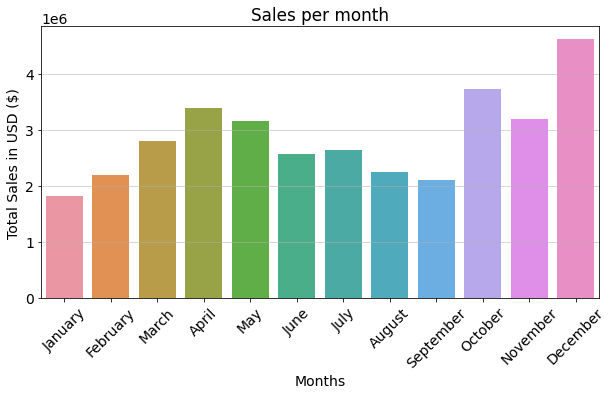

In [12]:
# Display a bar chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('Set2')

# Graphique
plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 14})
month_sales_barplot = sns.barplot(data = month_sales_df, x="Order Date", y="Total Sales")
plt.xticks(rotation=45)
month_sales_barplot.set(ylabel="Total Sales in USD ($)")
month_sales_barplot.set(xlabel='Months')
plt.title("Sales per month")
plt.grid(axis='y', linewidth = 0.5)

In [13]:
# Display the best month for sales
month_sales_df.loc[month_sales_df['Total Sales'].idxmax()]

Order Date            December
Quantity Ordered         28114
Price Each          4588415.41
Total Sales         4613443.34
Name: 2, dtype: object

### 2.b What city sold the most product?

In [14]:
# Extract City and Postcode from "Purchase Address"
frame[['Adress', 'City', 'Postcode']] = frame['Purchase Address'].str.rsplit(',', n=2, expand=True)

# Drop "Purchase Address"
frame.drop(['Purchase Address'], axis=1, inplace = True)

# Concatenate "City" & "Postcode"
frame["City"] = frame['City'] + frame["Postcode"]

# Drop "Postcode"
frame.drop(['Postcode'], axis=1, inplace = True)

# Remove Postcode from "City"
frame['City'] = frame['City'].str[:-5]

frame.head()

,Order ID,Product,Quantity Ordered,Price Each,Total Sales,Order Date,Order Time,Adress,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19,08:46,917 1st St,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07,22:30,682 Chestnut St,Boston MA
3,176560,Google Phone,1,600.00,600.00,2019-04-12,14:38,669 Spruce St,Los Angeles CA
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12,14:38,669 Spruce St,Los Angeles CA
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30,09:27,333 8th St,Los Angeles CA


In [15]:
# Aggregate the cities by the count of sales
city_sales_df = frame.groupby('City')['Total Sales'].sum()

# Convert to dataframe
city_sales_df = pd.DataFrame({'City' : city_sales_df.index, 'Total Sales' : city_sales_df.values})

city_sales_df

,City,Total Sales
0,Atlanta GA,2795498.58
1,Austin TX,1819581.75
2,Boston MA,3661642.01
3,Dallas TX,2767975.40
4,Los Angeles CA,5452570.80
5,New York City NY,4664317.43
6,Portland ME,449758.27
7,Portland OR,1870732.34
8,San Francisco CA,8262203.91
9,Seattle WA,2747755.48


In [16]:
# Aggregate the cities by the sum of sales
city_sales_df = frame.groupby('City')['Total Sales'].sum()

# Convert to dataframe
city_sales_df = pd.DataFrame({'City' : city_sales_df.index, 'Total Sales' : city_sales_df.values})

city_sales_df

,City,Total Sales
0,Atlanta GA,2795498.58
1,Austin TX,1819581.75
2,Boston MA,3661642.01
3,Dallas TX,2767975.40
4,Los Angeles CA,5452570.80
5,New York City NY,4664317.43
6,Portland ME,449758.27
7,Portland OR,1870732.34
8,San Francisco CA,8262203.91
9,Seattle WA,2747755.48


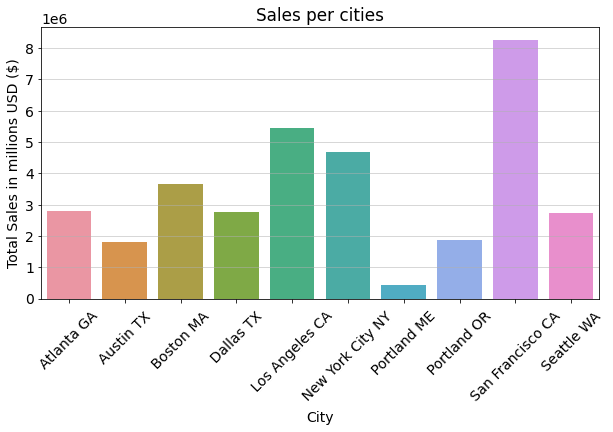

In [17]:
# Display a bar chart

plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 14})
city_sales_barplot = sns.barplot(data = city_sales_df, x="City", y="Total Sales")
plt.xticks(rotation=45)
city_sales_barplot.set(ylabel="Total Sales in millions USD ($)")
city_sales_barplot.set(xlabel='City')
plt.title("Sales per cities")
plt.grid(axis='y', linewidth = 0.5)

In [18]:
# Display the best city for sales
city_sales_df.loc[city_sales_df['Total Sales'].idxmax()]

City            San Francisco CA 
Total Sales            8262203.91
Name: 8, dtype: object

### 2.c What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [19]:
# Extract hour from "Order Time"
frame['Order hour'] = frame['Order Time'].str[:2]

# Move "Order Hour" position
frame = frame[['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Total Sales', 'Order Date', 'Order Time', 'Order hour', 'Adress', 'City']]

frame.head()

,Order ID,Product,Quantity Ordered,Price Each,Total Sales,Order Date,Order Time,Order hour,Adress,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19,08:46,08,917 1st St,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07,22:30,22,682 Chestnut St,Boston MA
3,176560,Google Phone,1,600.00,600.00,2019-04-12,14:38,14,669 Spruce St,Los Angeles CA
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12,14:38,14,669 Spruce St,Los Angeles CA
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30,09:27,09,333 8th St,Los Angeles CA


In [20]:
# Aggregate Order hour by the sum of 'Total Sales'
hour_sales_df = frame.groupby('Order hour')['Order ID'].count()

# Convert to dataframe
hour_sales_df = pd.DataFrame({'Hour' : hour_sales_df.index, 'Order ID' : hour_sales_df.values})

# Rename "Order ID" to "Order Count"
hour_sales_df.rename(columns={"Hour" : "Order Hour", "Order ID" : "Order Count"}, inplace = True)

hour_sales_df.head()

,Order Hour,Order Count
0,00,3910
1,01,2350
2,02,1243
3,03,831
4,04,854


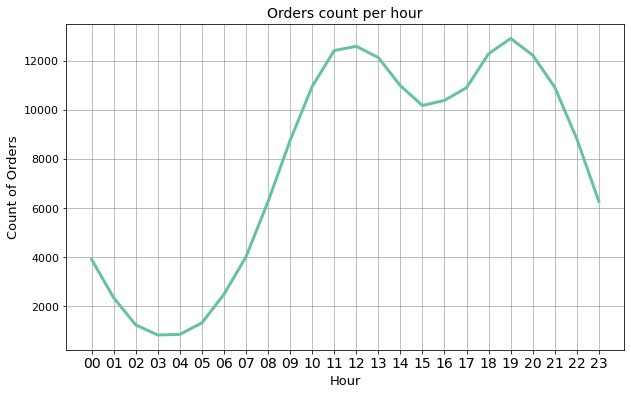

In [21]:
# Graphique
plt.figure(figsize=(10, 6))
plt.plot(hour_sales_df['Order Hour'], hour_sales_df['Order Count'], label='categ_0', linewidth=3)
plt.xlabel("Hour", fontsize=13)
plt.ylabel("Count of Orders", fontsize=13)
plt.yticks(fontsize=11)
plt.title("Orders count per hour", fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

In [22]:
# Display the best hour for sales
hour_sales_df.loc[hour_sales_df['Order Count'].idxmax()]

Order Hour        19
Order Count    12905
Name: 19, dtype: object

### 2.d What products are most often sold together?

In [23]:
# Create a df of duplicated Orders
duplicated_df = frame[frame['Order ID'].duplicated(keep = False)] # keep = False --> mark all duplicates as True

duplicated_df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Total Sales,Order Date,Order Time,Order hour,Adress,City
3,176560,Google Phone,1,600.00,600.00,2019-04-12,14:38,14,669 Spruce St,Los Angeles CA
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12,14:38,14,669 Spruce St,Los Angeles CA
18,176574,Google Phone,1,600.00,600.00,2019-04-03,19:42,19,20 Hill St,Los Angeles CA
19,176574,USB-C Charging Cable,1,11.95,11.95,2019-04-03,19:42,19,20 Hill St,Los Angeles CA
30,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07,11:31,11,823 Highland St,Boston MA
31,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07,11:31,11,823 Highland St,Boston MA
32,176586,AAA Batteries (4-pack),2,2.99,5.98,2019-04-10,17:00,17,365 Center St,San Francisco CA
33,176586,Google Phone,1,600.00,600.00,2019-04-10,17:00,17,365 Center St,San Francisco CA
119,176672,Lightning Charging Cable,1,14.95,14.95,2019-04-12,11:07,11,778 Maple St,New York City NY
120,176672,USB-C Charging Cable,1,11.95,11.95,2019-04-12,11:07,11,778 Maple St,New York City NY


In [24]:
# Create a "Grouped" Order ID column
duplicated_df['Grouped'] = duplicated_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

duplicated_df.head()

C:\Users\danie\AppData\Local\Temp\ipykernel_16848\351798924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_df['Grouped'] = duplicated_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Total Sales,Order Date,Order Time,Order hour,Adress,City,Grouped
3,176560,Google Phone,1,600.00,600.00,2019-04-12,14:38,14,669 Spruce St,Los Angeles CA,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12,14:38,14,669 Spruce St,Los Angeles CA,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,600.00,2019-04-03,19:42,19,20 Hill St,Los Angeles CA,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,11.95,2019-04-03,19:42,19,20 Hill St,Los Angeles CA,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07,11:31,11,823 Highland St,Boston MA,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [25]:
# Drop duplicated "Order ID" & "Grouped"
duplicated_df = duplicated_df[['Order ID', 'Grouped']].drop_duplicates()

duplicated_df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [26]:
duplicated_df['Grouped'].value_counts()

iPhone,Lightning Charging Cable                                            882
Google Phone,USB-C Charging Cable                                          856
iPhone,Wired Headphones                                                    361
Vareebadd Phone,USB-C Charging Cable                                       312
Google Phone,Wired Headphones                                              303
                                                                          ... 
Google Phone,USB-C Charging Cable,Wired Headphones,USB-C Charging Cable      1
34in Ultrawide Monitor,LG Washing Machine                                    1
20in Monitor,iPhone                                                          1
Google Phone,USB-C Charging Cable,Wired Headphones,27in FHD Monitor          1
LG Washing Machine,AA Batteries (4-pack)                                     1
Name: Grouped, Length: 366, dtype: int64

### 2.e What product sold the most? Why do you think it sold the most?

In [27]:
# Aggregate Product by the sum of "Quantity Ordered"
Product_df = frame.groupby('Product').sum()

# Reset index
Product_df.reset_index(inplace = True)

Product_df.head()

,Product,Quantity Ordered,Price Each,Total Sales
0,20in Monitor,4129,451068.99,454148.71
1,27in 4K Gaming Monitor,6244,2429637.70,2435097.56
2,27in FHD Monitor,7550,1125974.93,1132424.50
3,34in Ultrawide Monitor,6199,2348718.19,2355558.01
4,AA Batteries (4-pack),27635,79015.68,106118.40


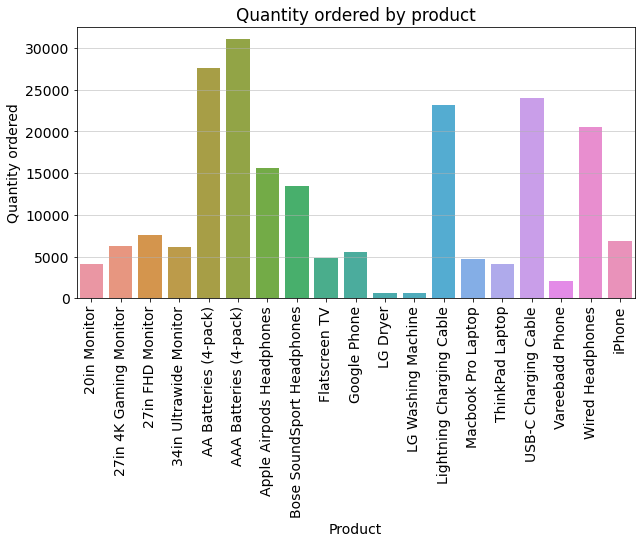

In [28]:
# Display a bar chart

plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 14})
product_sales_barplot = sns.barplot(data = Product_df, x="Product", y="Quantity Ordered")
plt.xticks(rotation=90)
product_sales_barplot.set(ylabel="Quantity ordered")
product_sales_barplot.set(xlabel='Product')
plt.title("Quantity ordered by product")
plt.grid(axis='y', linewidth = 0.5)

In [29]:
# Display the most ordered
Product_df.loc[Product_df['Quantity Ordered'].idxmax()]

Product             AAA Batteries (4-pack)
Quantity Ordered                     31017
Price Each                        61716.59
Total Sales                       92740.83
Name: 5, dtype: object

In [30]:
# Get the price by product
Product_df = frame[['Product', 'Price Each']].drop_duplicates()

# Sort by the lowest price first
Product_df = Product_df.sort_values('Price Each', ascending = True)

Product_df.head()

,Product,Price Each
20,AAA Batteries (4-pack),2.99
14,AA Batteries (4-pack),3.84
0,USB-C Charging Cable,11.95
4,Wired Headphones,11.99
12,Lightning Charging Cable,14.95
